Plot the contours and the data aligned 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Import CMasher to register colormaps
import cmasher as cmr

from astropy.wcs import WCS

In [2]:
#HST

hst_file = "/home/carlos/Downloads/Total_Arcs_wcs.fits"
hst_hdu = fits.open(hst_file)               #Abrindo imagem
hst_img = hst_hdu[1].data                   #Pega os dados da img
hst_wcs = WCS(hst_hdu[1].header)            #Pega wcs do hst

In [3]:
#ALMA

alma_file = "/home/carlos/Downloads/ALMA_resampled_with_beam.fits"
alma_hdu = fits.open(alma_file)               #Abrindo imagem
alma_img = alma_hdu[0].data                   #Pega os dados da img
alma_wcs = WCS(alma_hdu[0].header)            #Pega wcs do alma

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [4]:
#MUSE

muse_file = "/home/carlos/Downloads/Signal_and_noise.fits"
muse_hdu = fits.open(muse_file)               #Abrindo imagem
muse_img = muse_hdu[1].data                   #Pega os dados da img
muse_wcs = WCS(muse_hdu[1].header)            #Pega wcs do muse

In [5]:
#Coloca todo mundo no mesmo WCS
from reproject import reproject_interp

alma_reshape, alma_footprint = reproject_interp((alma_img, alma_wcs), hst_hdu[1].header)
muse_reshape, muse_footprint = reproject_interp((muse_img, muse_wcs.celestial), hst_hdu[1].header)

NameError: name 'levels' is not defined

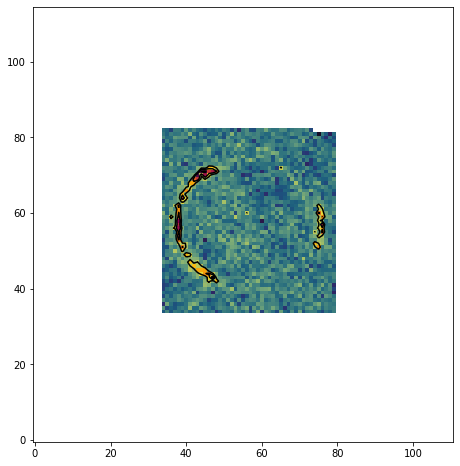

In [6]:
#Levels ALMA

plt.figure(figsize=(12,8))
ax = plt.gca()
ax.axis('equal')
ax.set_adjustable('box')

levels_alma = 0.00025* 10**(-0.4*np.arange(0, 1.8, 0.6)[::-1]) # 0.5 mag/arcsec^2 steps
cnt = ax.contour(alma_reshape, levels_alma, colors = 'k', linestyles='solid')
ax.imshow(alma_reshape, cmap=cmr.pride, interpolation='nearest', origin='lower',
                   )
levels

array([ 3.15478672,  5.        ,  7.92446596, 12.55943216, 19.90535853,
       31.54786722, 50.        ])

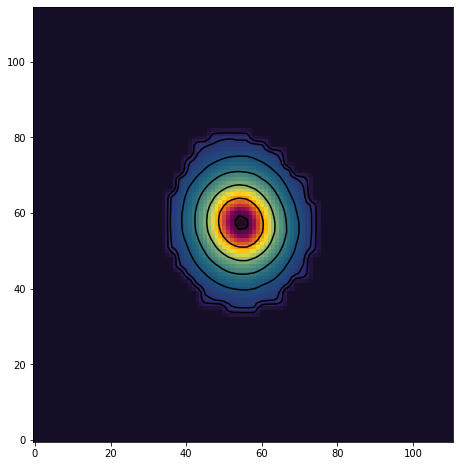

In [8]:
#Contornos para os dados do MUSE
plt.figure(figsize=(12,8))
ax = plt.gca()
ax.axis('equal')
ax.set_adjustable('box')

levels_muse = 50 * 10**(-0.4*np.arange(0, 3.5, 0.5)[::-1]) # 0.5 mag/arcsec^2 steps
cnt = ax.contour(muse_reshape, levels_muse, colors = 'k', linestyles='solid')
ax.imshow(muse_reshape, cmap=cmr.pride, interpolation='nearest', origin='lower',
                   )
levels_muse

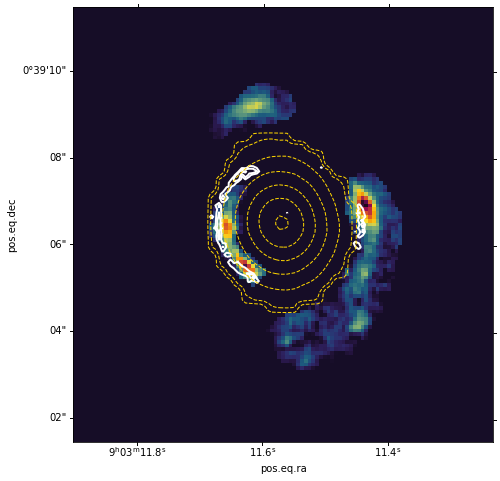

In [10]:
plt.figure(figsize=(12,8))
ax = plt.gca(projection=hst_wcs)
ax.axis('equal')
ax.set_adjustable('box')



ax.imshow(hst_img, cmap=cmr.pride, interpolation='nearest', origin='lower', vmin=0)
cnt = ax.contour(alma_reshape, levels=levels_alma, colors = 'white',
                 linestyles='solid',linewidths=2)
cnt2 = ax.contour(muse_reshape, levels=levels_muse, colors = 'gold',
                 linestyles='dashed',linewidths=1)


# Alguns testes com para gerar contornos

array([0.19054607, 0.33113112, 0.57543994, 1.        ])

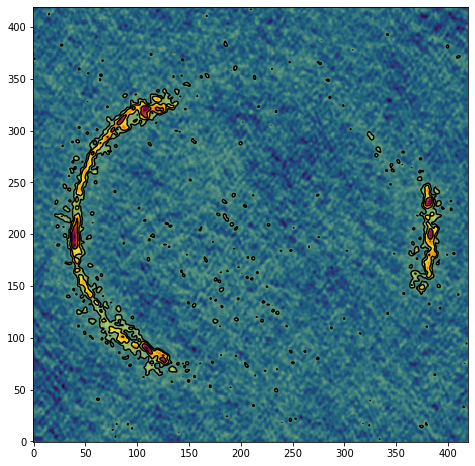

In [10]:
plt.figure(figsize=(12,8))
ax = plt.gca()
ax.axis('equal')
ax.set_adjustable('box')

levels = 1* 10**(-0.4*np.arange(0, 2, 0.6)[::-1]) # 0.5 mag/arcsec^2 steps
cnt = ax.contour(alma_img/alma_img.max(), levels, colors = 'k', linestyles='solid')
ax.imshow(alma_img/alma_img.max(), cmap=cmr.pride, interpolation='nearest', origin='lower',
                   )
levels